In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read and print the data

df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Split data into training and testing groups

from sklearn.model_selection import train_test_split
features = df[df.columns[0:len(df.columns)-1]]
labels = df[df.columns[len(df.columns)-1]]
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,
    test_size=0.30)
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
208106,3217,49,13,0,0,2701,225,211,118,2489,...,0,0,0,0,0,0,0,0,0,0
180362,2925,56,5,120,-2,815,223,229,141,2242,...,0,0,0,0,0,0,0,0,0,0
109700,3007,324,16,124,28,4937,177,221,182,1040,...,0,0,0,0,0,0,0,0,0,0
16860,2617,288,1,150,5,693,216,238,159,6140,...,0,0,0,0,0,0,0,0,0,0
418968,3016,43,16,618,135,1648,221,203,112,3013,...,0,0,1,0,0,0,0,0,0,0


In [4]:
#Standardize the data

from sklearn import preprocessing

# Standardize all data

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)



# Dont standardize soil types (bools)
'''
data_to_standardize_train = X_train[X_train.columns[0:10]]
data_to_standardize_test = X_test[X_test.columns[0:10]]
std_scale = preprocessing.StandardScaler().fit(data_to_standardize_train)
X_train_std = std_scale.transform(data_to_standardize_train)
X_test_std = std_scale.transform(data_to_standardize_test)
X_train_std = np.concatenate([X_train_std, X_train[X_train.columns[10:]]], axis = 1)
X_test_std = np.concatenate([X_test_std, X_test[X_test.columns[10:]]], axis = 1)
'''

# Dont standardize any data
'''
X_train_std = X_train
X_test_std = X_test
'''


'\nX_train_std = X_train\nX_test_std = X_test\n'

In [5]:
# Learn the neural net

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100, ), activation='tanh', solver='adam')

# Record the time it takes to learn
import time
start_time = time.time()

clf.fit(X_train_std, Y_train) 

# Print the time it took
print("--- %s seconds ---" % (time.time() - start_time))

--- 515.8517632484436 seconds ---


In [6]:
clf.score(X_test_std, Y_test)

0.9499093537727189

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = clf.predict(X_test_std)
conf_mat = confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          1       0.95      0.95      0.95     63756
          2       0.96      0.96      0.96     84857
          3       0.94      0.94      0.94     10687
          4       0.87      0.81      0.84       810
          5       0.84      0.86      0.85      2801
          6       0.89      0.91      0.90      5274
          7       0.95      0.95      0.95      6119

avg / total       0.95      0.95      0.95    174304



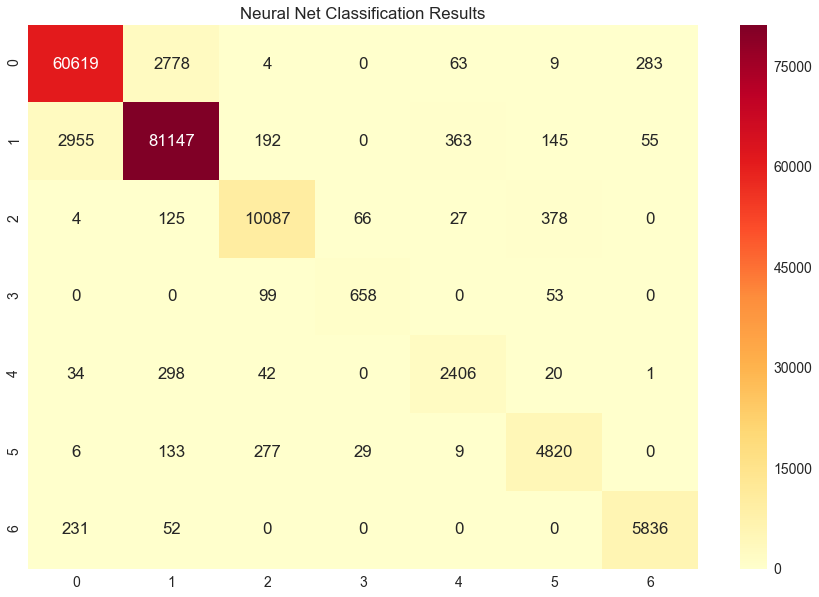

In [9]:
import seaborn as sns
%matplotlib inline
df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (15,10))
plt.title('Neural Net Classification Results')
sns.set(font_scale =1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g', cmap='YlOrRd')
plt.savefig('lr.jpeg')